# Aprendizagem de Máquina I

## Hugo Tremonte de Carvalho

#### hugo@dme.ufrj.br

O objetivo dessa atividade é trabalhar o SVM com dados artificiais. Vamos lá!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.datasets import make_moons, make_circles, make_blobs

A função abaixo faz um gráfico e mostra diversos sumários numéricos referentes a um SVM:

In [15]:
########## PLOT SVC ##########
# FONTE: https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Chapter%209.ipynb (com modificações)

def plot_svc(svc, X_train, y_train, X_test, y_test, h=0.02, pad=0.25, plot_sv = True, gridsearch = False):
    # Make grid
    x_min, x_max = X_train[:, 0].min()-pad, X_train[:, 0].max()+pad
    y_min, y_max = X_train[:, 1].min()-pad, X_train[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot train
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 5)
    ax1.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    ax1.scatter(X_train[:,0], X_train[:,1], s=70, c=y_train, cmap=plt.cm.Paired)
    ax1.set_title('Train set')
    
    # Support vectors indicated in plot by +
    if plot_sv:
        if gridsearch:
            sv = svc.best_estimator_.support_vectors_
            ax1.scatter(sv[:,0], sv[:,1], c='k', marker='+', s=70, linewidths=1)
        else:
            sv = svc.support_vectors_
            ax1.scatter(sv[:,0], sv[:,1], c='k', marker='+', s=70, linewidths=1)

    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(y_min, y_max)
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')

    # Plot test
    ax2.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    ax2.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
    ax2.set_title('Test set')

    ax2.set_xlim(x_min, x_max)
    ax2.set_ylim(y_min, y_max)
    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    
    plt.show()

    print('==== MÉTRICAS ====')
    if gridsearch:
        print('Quantidade de vetores-suporte: ', svc.best_estimator_.support_.size)
    else:
        print('Quantidade de vetores-suporte: ', svc.support_.size)

    CM = metrics.confusion_matrix(y_test, svc.predict(X_test))

    ConfusionMatrixMetrics(CM).print()
##############################

########## PRETTY MATRIX DISPLAY ##########
# Source: https://gist.github.com/braingineer/d801735dac07ff3ac4d746e1f218ab75
def matprint(mat, fmt="g", round_dig = 0):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            if round_dig == 0:
                print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
            else:
                print(("{:"+str(col_maxes[i])+fmt+"}").format(round(y, round_dig)), end="  ")
        print("")
###########################################

########## CONFUSION MATRIX METRICS ##########
class ConfusionMatrixMetrics:
    def __init__(self, matrix):
        """
        Inicializa a classe com uma matriz de confusão 2x2.
        A matriz deve estar no formato:
        [[VN, FP],
         [FN, VP]]
        onde:
        - VP: Verdadeiros Positivos
        - FP: Falsos Positivos
        - FN: Falsos Negativos
        - VN: Verdadeiros Negativos
        """
        self.matrix = matrix

        self.VN = self.matrix[0][0]
        self.FP = self.matrix[0][1]
        self.FN = self.matrix[1][0]
        self.VP = self.matrix[1][1]

        self.N = self.matrix[0][0] + self.matrix[0][1]
        self.P = self.matrix[1][0] + self.matrix[1][1]

        self.Pop = self.N + self.P
    
    def prev(self):
        """Calcula a prevalência da classe positiva"""
        try:
            return (self.P)/(self.Pop)
        except ZeroDivisionError:
            return 0.0
    
    def acc(self):
        """Calcula a acurária"""
        try:
            return (self.VN + self.VP)/self.Pop
        except ZeroDivisionError:
            return 0.0

    def FPR(self):
        """Calcula a FPR"""
        try:
            return self.FP/self.N
        except ZeroDivisionError:
            return 0.0

    def TNR(self):
        """Calcula a TNR"""
        try:
            return self.VN/self.N
        except ZeroDivisionError:
            return 0.0

    def TPR(self):
        """Calcula a TPR"""
        try:
            return self.VP/self.P
        except ZeroDivisionError:
            return 0.0
    
    def FNR(self):
        """Calcula a FNR"""
        try:
            return self.FN/self.P
        except ZeroDivisionError:
            return 0.0
        
    def FOR(self):
        """Calcula a FOR"""
        try:
            return self.FN/(self.VN + self.FN)
        except ZeroDivisionError:
            return 0.0

    def PPV(self):
        """Calcula o PPV"""
        try:
            return self.VP/(self.FP + self.VP)
        except ZeroDivisionError:
            return 0.0

    def NPV(self):
        """Calcula a NPV"""
        try:
            return self.VN/(self.VN + self.FN)
        except ZeroDivisionError:
            return 0.0

    def FDR(self):
        """Calcula a FDR"""
        try:
            return self.FP/(self.FP + self.VP)
        except ZeroDivisionError:
            return 0.0

    def F1(self):
        """Calcula a F1"""
        try:
            return 2/(1/self.PPV() + 1/self.TPR())
        except ZeroDivisionError:
            return np.NaN
    
    def print(self):
        """Mostra todas as métricas calculadas acima"""
        print('Matriz de confusão:')
        matprint(self.matrix)

        print('\n')

        print('Prevalência:', np.round(self.prev(), 3))
        print('Acurácia:', np.round(self.acc(), 3))

        print('\n')

        print('Taxa de falsos positivos:', np.round(self.FPR(), 3))
        print('Taxa de verdadeiros negativos (Especificidade):',np.round(self.TNR(), 3))
        print('Taxa de verdadeiros positivos (Recall):', np.round(self.TPR(), 3))
        print('Taxa de falsos negativos:', np.round(self.FNR(), 3))

        print('\n')

        print('False omission rate:', np.round(self.FOR(), 3))
        print('Valor preditivo positivo (Precisão):', np.round(self.PPV(), 3))
        print('Valor preditivo negativo:', np.round(self.NPV(), 3))
        print('False discovery rate:', np.round(self.FDR(), 3))

        print('\n')

        print('F1 Score:', np.round(self.F1(), 3))
    ##############################################

a) Gere um conjunto de dados linearmente separável e teste o `SVC` com `kernel = 'linear'` e diversos valores do hiperparâmetro $C$. Estude detalhadamente a documentação da função `SVC`. Relacione com o que vimos em sala de aula. Valide o seu resultado no conjunto de teste.

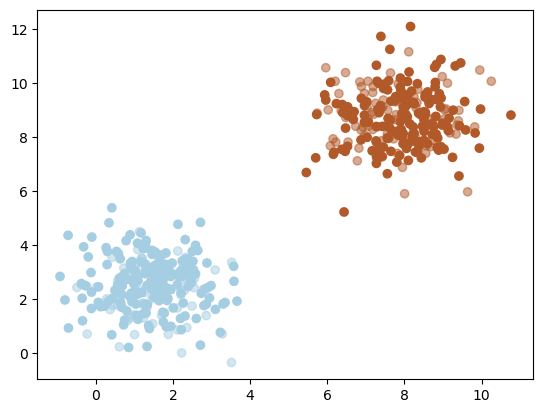

In [16]:
X, y = make_blobs(n_samples = 500, centers = 2, n_features = 2, center_box=(0, 10))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

plt.scatter(*X_train.T, c = y_train, alpha = 1, cmap = plt.cm.Paired)
plt.scatter(*X_test.T, c = y_test, alpha = 0.5, cmap = plt.cm.Paired)

plt.show()

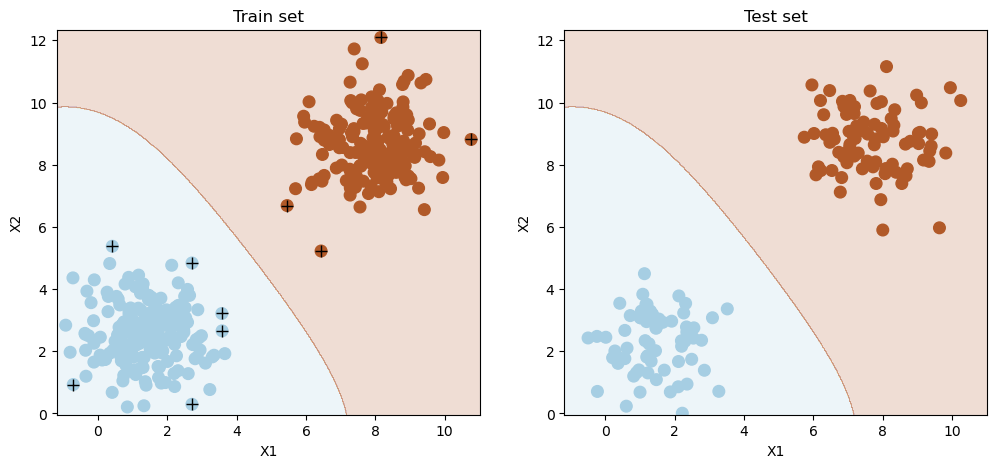

==== MÉTRICAS ====
Quantidade de vetores-suporte:  10
Matriz de confusão:
67   0  
 0  83  


Prevalência: 0.553
Acurácia: 1.0


Taxa de falsos positivos: 0.0
Taxa de verdadeiros negativos (Especificidade): 1.0
Taxa de verdadeiros positivos (Recall): 1.0
Taxa de falsos negativos: 0.0


False omission rate: 0.0
Valor preditivo positivo (Precisão): 1.0
Valor preditivo negativo: 1.0
False discovery rate: 0.0


F1 Score: 1.0


In [17]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

svm_lin = SVC(kernel = 'rbf', C = 1)
svm_lin.fit(X_train, y_train)

plot_svc(svm_lin, X_train, y_train, X_test, y_test)

b) Escolha algum dos conjuntos de dados artificiais abaixo para continuar sua análise

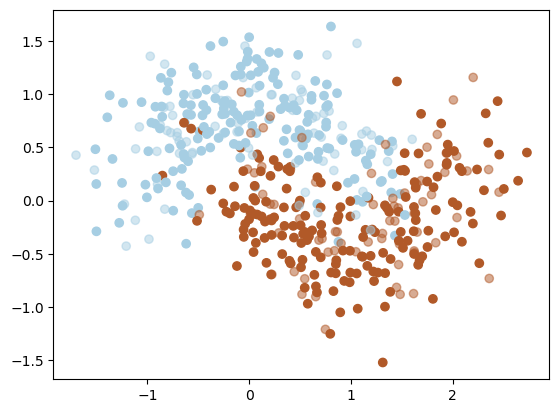

In [8]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

X, y = make_moons(n_samples = 500, noise = 0.3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

plt.scatter(*X_train.T, c = y_train, alpha = 1, cmap = plt.cm.Paired)
plt.scatter(*X_test.T, c = y_test, alpha = 0.5, cmap = plt.cm.Paired)

plt.show()

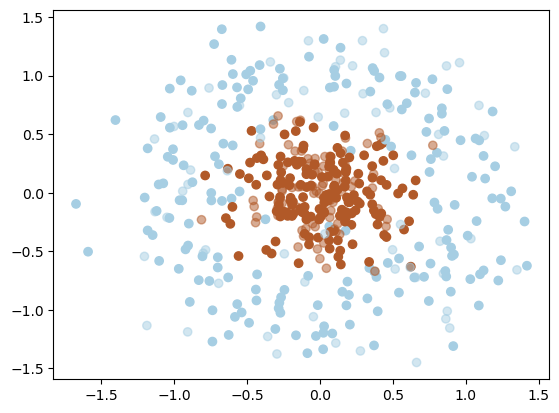

In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

X, y = make_circles(n_samples = 500, noise = 0.25, factor = 0.15)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

plt.scatter(*X_train.T, c = y_train, alpha = 1, cmap = plt.cm.Paired)
plt.scatter(*X_test.T, c = y_test, alpha = 0.5, cmap = plt.cm.Paired)

plt.show()

c) No conjunto de dados que você escolheu acima teste o `SVC` com `kernel = 'linear'` e diversos valores do(s) seu(s) hiperparâmetro(s). Estude a documentação para entender do que se tratam tal(is) hiperparâmetro(s).

d) No conjunto de dados que você escolheu acima teste o `SVC` com `kernel = 'poly'` e diversos valores do(s) seu(s) hiperparâmetro(s). Estude a documentação para entender do que se tratam tal(is) hiperparâmetro(s).

e) No conjunto de dados que você escolheu acima teste o `SVC` com `kernel = 'rbf'` e diversos valores do(s) seu(s) hiperparâmetro(s). Estude a documentação para entender do que se tratam tal(is) hiperparâmetro(s).

f) Escolha um dos _kernel_ acima e encontre o melhor conjunto de hiperparâmetro(s) utilizando validação cruzada. Valide o seu resultado no conjunto de teste.

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# EXEMPLO DE USO - teste com outro kernel também!

param_lin = [{'C': [0.001, 0.01, 0.1, 1, 3, 5, 10, 100]}]
svm_lin_CV = GridSearchCV(SVC(kernel = 'linear'), param_grid = param_lin, cv = 5, scoring = 'accuracy', verbose = 1, n_jobs = -1)

svm_lin_CV.fit(X_train, y_train)

print('Best estimator:', svm_lin_CV.best_estimator_)

pd.DataFrame(svm_lin_CV.cv_results_)

plot_svc(svm_lin_CV, X_train, y_train, X_test, y_test, gridsearch = True)